In [60]:
!pip3 install pandas
import pandas as pd
Data1 = pd.read_csv("C:/Users/e10115326/Downloads/homes (1).csv")
Data1
df = pd.DataFrame(Data1)
df
#df = globals()['df1']
df.head(10)
#df.tail(10)

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
40,128,135,17,9,4,1,25,0.52,3374
41,110,120,15,8,4,2,11,0.59,3119
42,123,130,18,8,4,2,43,0.39,3268
43,212,230,39,12,5,3,202,4.29,3648
44,145,145,18,8,4,2,44,0.22,2783
45,129,135,10,6,3,1,15,1.00,2438
46,143,145,21,7,4,2,10,1.20,3529
47,247,252,29,9,4,2,4,1.25,4626
48,111,120,15,8,3,1,97,1.11,3205
49,133,145,26,7,3,1,42,0.36,3059


In [76]:
df.columns = df.columns.str.strip()
df.describe()
df.columns
df['Rooms']

0     10
1      8
2      6
3      7
4      8
5      7
6      8
7      8
8     10
9      5
10     8
11     7
12     8
13     8
14     8
15     8
16     9
17     7
18     7
19     8
20     9
21     8
22     9
23     9
24     9
25     8
26     8
27     7
28    11
29     8
30     7
31     9
32     8
33     6
34     7
35     7
36    10
37     8
38    10
39     8
40     9
41     8
42     8
43    12
44     8
45     6
46     7
47     9
48     8
49     7
Name: Rooms, dtype: int64


Add the code necessary to describe the dataset
Using markdown commentary describe the dataset

Observation:

Conduct at least three EDA techniques on the dataset, include markdown commentary to describe what you are doing, why you are doing it and the results of each analysis

Analysis1: Box plot of variable to check for outliers and take decision based on that to transform the column to avoid impact on analysis

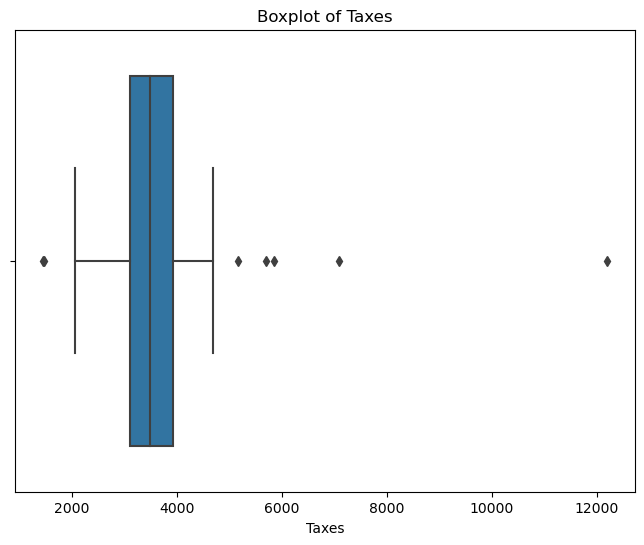

In [78]:
#Boxplot for outlier detection

!pip3 install seaborn
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Taxes'])
plt.title('Boxplot of Taxes')
plt.show()

Observation for Analysis 1: 4 outliers exist in Taxes variable. Which could be treated further based on the business requirement.

Analysis 2: Histogram of a variable to understand the distribution of Sell price vairable. It gives idea based on frequency.

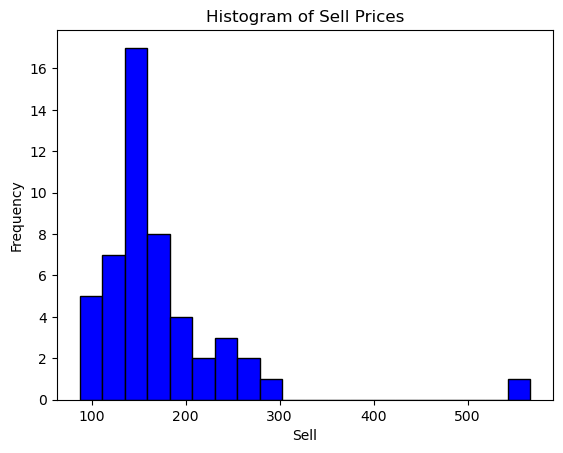

In [79]:
plt.hist(df['Sell'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sell Prices')
plt.xlabel('Sell')
plt.ylabel('Frequency')
plt.show()

Observation: Sell variable is righ skewed

Analysis 3: Correlation matrix to understand correlation between different variables in the data set. So few can be considered for exclusion or suitable for dependent and independent analysis in regression.

In [36]:
correlation_matrix = df.corr()
print(correlation_matrix)

             Sell      List    Living     Rooms      Beds     Baths       Age  \
Sell     1.000000  0.997433  0.879381  0.560425  0.335113  0.640059 -0.147343   
 List    0.997433  1.000000  0.891618  0.570704  0.320470  0.640295 -0.130325   
 Living  0.879381  0.891618  1.000000  0.750933  0.467277  0.668437  0.125075   
 Rooms   0.560425  0.570704  0.750933  1.000000  0.656557  0.555187  0.371237   
 Beds    0.335113  0.320470  0.467277  0.656557  1.000000  0.458682  0.141205   
 Baths   0.640059  0.640295  0.668437  0.555187  0.458682  1.000000 -0.023063   
 Age    -0.147343 -0.130325  0.125075  0.371237  0.141205 -0.023063  1.000000   
 Acres   0.168713  0.166838  0.177488  0.282448  0.036832  0.301119  0.303733   
 Taxes   0.899339  0.906636  0.810243  0.516593  0.313638  0.582622 -0.189221   

            Acres     Taxes  
Sell     0.168713  0.899339  
 List    0.166838  0.906636  
 Living  0.177488  0.810243  
 Rooms   0.282448  0.516593  
 Beds    0.036832  0.313638  
 Baths   

Observation: List price has strong correlation to Sell. Age has -ve correlation but again weak. Acres also found to have weak positive correlation with Sell price.

Using Taxes as the independent variable and Sell as the dependent variable, fit a linear regression model and display the output from the mode

In [85]:
import statsmodels.api as sm


X = df['Taxes']  # Independent variable
y = df['Sell']   # Dependent variable

X = sm.add_constant(X)  # Add a constant term to the independent variable
model = sm.OLS(y, X).fit()  # Fit the ordinary least squares (OLS) model
print(model.summary())  # Display the regression results

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        21:56:46   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

Observation: Adjusted R value of 80.5 is considered good to establish impact on Selling price as dependent variable when Taxes change. Taxes can be good predictor of Selling price in this dataset
- P-value is < 0.05 significance. Hence it can be considered as good predictor.

In [86]:
import statsmodels.api as sm

# Assuming 'df' is your DataFrame
X = df['Rooms']  # Independent variable
y = df['Sell']   # Dependent variable

X = sm.add_constant(X)  # Add a constant term to the independent variable
model = sm.OLS(y, X).fit()  # Fit the ordinary least squares (OLS) model
print(model.summary())  # Display the regression results

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     21.98
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.31e-05
Time:                        21:59:57   Log-Likelihood:                -275.37
No. Observations:                  50   AIC:                             554.7
Df Residuals:                      48   BIC:                             558.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -85.5335     55.258     -1.548      0.1

Observation: Adjusted R of 30 % is not good enough as a model statistics. And model based on Rooms is not prefered compared to above model with Taxes as independent variable.

Limitation: Collinearity between independent variables can impact the accuracy. And in case we miss any relevant variable the results are not accurate.